In [91]:
# 데이터 구성 : Series, DataFrame
import pandas as pd
# 행렬 연산
import numpy as np

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# Scaling
from sklearn.preprocessing import StandardScaler

# 데이터 분할
from sklearn.model_selection import train_test_split

# 로지스틱 회귀
from statsmodels.api import Logit

# 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier

# 의사결정나무
from sklearn.tree import DecisionTreeClassifier

# 그래디언트부스팅
from sklearn.ensemble import GradientBoostingClassifier

#KNN
from sklearn.neighbors import KNeighborsClassifier

# 평가함수
from sklearn.metrics import accuracy_score

# confusion matrix
from sklearn.metrics import confusion_matrix

# column counter
from collections import Counter
import graphviz

from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV
import os

In [2]:
matplotlib.rc("font", family="NanumGothic")
plt.rcParams['axes.unicode_minus']=False
os.environ['PATH']+=os.pathsep+"~/anaconda3/lib/python3.7/site-packages"

In [3]:
import warnings

warnings.filterwarnings("ignore")

# 1. Logistic Regression

#### 데이터 불러오기

In [4]:
df_raw = pd.read_csv("../data/BigData/통신고객이탈.csv", engine = "python", encoding = "EUC-KR")
df_raw.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [5]:
# 데이터 전처리 - 결측치 처리
df_raw.isnull().sum(axis = 0)

CHURN                 0
CUSTOMER_ID           0
GENDER                0
AGE                   0
CHARGE_TYPE           0
HANDSET               0
USAGE_BAND            0
SERVICE_DURATION      0
DROPPED_CALLS         0
PEAK_CALLS_NO         0
PEAK_CALLS_TIME       0
WEEKEND_CALLS_NO      0
WEEKEND_CALLS_TIME    0
TOTAL_CALLS_NO        0
TOTAL_CALLS_TIME      0
dtype: int64

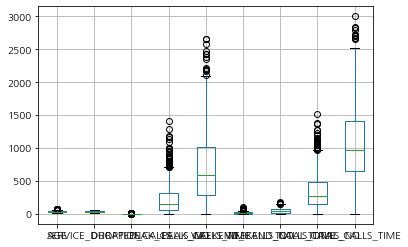

In [6]:
df_raw.boxplot()

In [17]:
# 범주형 데이터 value_counts
list_cols = ["CHURN", "GENDER", "CHARGE_TYPE", "HANDSET", "USAGE_BAND"]

print(list_cols)

for v_col in list_cols:
    print()
    print("변수", v_col, "Level 수 = ", Counter(df_raw[v_col]))

['CHURN', 'GENDER', 'CHARGE_TYPE', 'HANDSET', 'USAGE_BAND']

변수 CHURN Level 수 =  Counter({0: 750, 1: 180})

변수 GENDER Level 수 =  Counter({'F': 492, 'M': 438})

변수 CHARGE_TYPE Level 수 =  Counter({'CAT 200': 394, 'CAT 100': 187, 'Play 100': 155, 'Play 300': 137, 'CAT 50': 57})

변수 HANDSET Level 수 =  Counter({'S50': 211, 'S80': 160, 'BS110': 145, 'ASAD170': 115, 'WC95': 114, 'BS210': 60, 'ASAD90': 56, 'CAS30': 35, 'CAS60': 13, 'SOP10': 11, 'SOP20': 10})

변수 USAGE_BAND Level 수 =  Counter({'Med': 506, 'MedHigh': 237, 'MedLow': 107, 'High': 63, 'Low': 15, 'None': 2})


범주형 데이터 바꾸기

In [8]:
df_raw["CHURN"] = np.where(df_raw["CHURN"] == "Active", 0, 1)
df_raw.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,0,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,0,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,0,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,0,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,0,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


#### 데이터 분리

In [9]:
# 데이터 전처리 - 데이터 분할
df_train, df_test = train_test_split(df_raw, test_size = 0.3, random_state = 1234)
print("train data size : {}".format(df_train.shape))
print("test data size : {}".format(df_test.shape))

train data size : (651, 15)
test data size : (279, 15)


In [10]:
df_train.columns

Index(['CHURN', 'CUSTOMER_ID', 'GENDER', 'AGE', 'CHARGE_TYPE', 'HANDSET',
       'USAGE_BAND', 'SERVICE_DURATION', 'DROPPED_CALLS', 'PEAK_CALLS_NO',
       'PEAK_CALLS_TIME', 'WEEKEND_CALLS_NO', 'WEEKEND_CALLS_TIME',
       'TOTAL_CALLS_NO', 'TOTAL_CALLS_TIME'],
      dtype='object')

#### 회귀모델 생성

In [11]:
# 모델 및 회귀 계수 검토

log_model = Logit.from_formula("""CHURN ~ C(GENDER) + AGE + C(CHARGE_TYPE) + C(HANDSET) + C(USAGE_BAND) \
+ SERVICE_DURATION + DROPPED_CALLS + PEAK_CALLS_NO + PEAK_CALLS_TIME  + WEEKEND_CALLS_NO \
+ WEEKEND_CALLS_TIME + TOTAL_CALLS_NO + TOTAL_CALLS_TIME""", df_train)

log_result = log_model.fit()
print(log_result.summary())

         Current function value: 0.253230
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  CHURN   No. Observations:                  651
Model:                          Logit   Df Residuals:                      621
Method:                           MLE   Df Model:                           29
Date:                Mon, 28 Oct 2019   Pseudo R-squ.:                  0.5059
Time:                        14:17:56   Log-Likelihood:                -164.85
converged:                      False   LL-Null:                       -333.64
Covariance Type:            nonrobust   LLR p-value:                 2.736e-54
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    -24.1056   2065.436     -0.012      0.991   -4072.286    4024.075
C(GENDER)[T.M]   

**C(USAGE_BAND)[T.Low] C(USAGE_BAND)[T.Med] C(USAGE_BAND)[T.MedHigh] C(USAGE_BAND)[T.MedLow] C(USAGE_BAND)[T.None]**의 p-value가 0.05보다 작기때문에 유의하다고 볼 수 있고, 따라서 변수 USAGE_BAND는 유의하다고 판단 할 수 있음

**SERVICE_DURATION, DROPPED_CALLS 또한 유의하다고 판단 할 수 있음**

In [12]:
# 예측 성능 평가
y_pred = log_result.predict(df_test)
y_pred_class = (y_pred > 0.5).astype(int)
y_pred_class.head()

530    0
534    0
699    0
641    0
319    0
dtype: int64

In [13]:
y_pred.head() # 실제로 나오는 값.

530    1.083588e-01
534    2.688294e-01
699    2.779741e-16
641    6.389340e-02
319    1.982053e-01
dtype: float64

In [14]:
print("Accuracy : {0:.3f}".format(accuracy_score(df_test["CHURN"], y_pred_class)))
print("Confusion Matrix : \n{}".format(confusion_matrix(df_test["CHURN"], y_pred_class)))

Accuracy : 0.914
Confusion Matrix : 
[[227   8]
 [ 16  28]]


# 2. Decision Tree

In [74]:
df_raw = pd.read_csv("../data/BigData/통신고객이탈.csv", engine = "python", encoding = "EUC-KR")
df_raw.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [75]:
df_raw["CHURN"] = np.where(df_raw["CHURN"] == "Active", 0, 1)
df_raw.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,0,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,0,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,0,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,0,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,0,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [76]:
df_raw_x= df_raw.drop(['CHURN', 'CUSTOMER_ID'], axis= 1, inplace= False)

df_raw_dummy= pd.get_dummies(df_raw_x)

df_raw_dummy.head()

,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,GENDER_F,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,31,33.33,6,218,379.8,9,21.6,366,632.4,1,...,0,0,0,0,0,0,1,0,0,0
1,27,30.87,10,373,656.4,11,28.0,411,810.4,0,...,0,0,0,0,0,0,1,0,0,0
2,27,49.40,11,260,582.0,0,0.0,265,614.1,0,...,0,0,0,0,0,0,1,0,0,0
3,61,48.60,1,294,661.8,14,101.5,326,844.0,0,...,0,0,0,0,0,0,1,0,0,0
4,52,56.03,0,221,555.6,7,25.0,274,673.0,1,...,0,0,0,0,0,0,1,0,0,0


In [94]:
len(df_raw_dummy.columns)

33

In [95]:
dr_raw_y=df_raw['CHURN']

#### Data 나누기

In [98]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_dummy, dr_raw_y, test_size=0.3, random_state=88)
print("train size is {}".format(df_train_x.shape))
print("test size is {}".format(df_test_x.shape))

print("test size is {}".format(df_test_y.shape))

train size is (651, 33)
test size is (279, 33)
test size is (279,)


In [99]:
tree_uncustomized =  DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(df_train_x,df_train_y)

print("Accuracy on training set : {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set : {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set : 1.000
Accuracy on test set : 0.857


##### Depth 정하기

In [100]:
train_accuracy =[]; test_accuracy=[]

para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree=DecisionTreeClassifier(max_depth=v_max_depth, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth']=para_depth
df_accuracy_depth['TrainAccuracy']=train_accuracy
df_accuracy_depth['TestAccuracy']=test_accuracy

df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.857,0.817
1,2,0.885,0.846
2,3,0.908,0.860
3,4,0.917,0.839
4,5,0.932,0.878
5,6,0.943,0.878
6,7,0.954,0.857
7,8,0.959,0.864
8,9,0.978,0.839
9,10,0.986,0.849


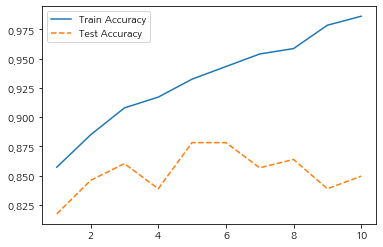

In [101]:
plt.plot(para_depth, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle="--", label="Test Accuracy")
plt.legend()

depth는 4로 결정

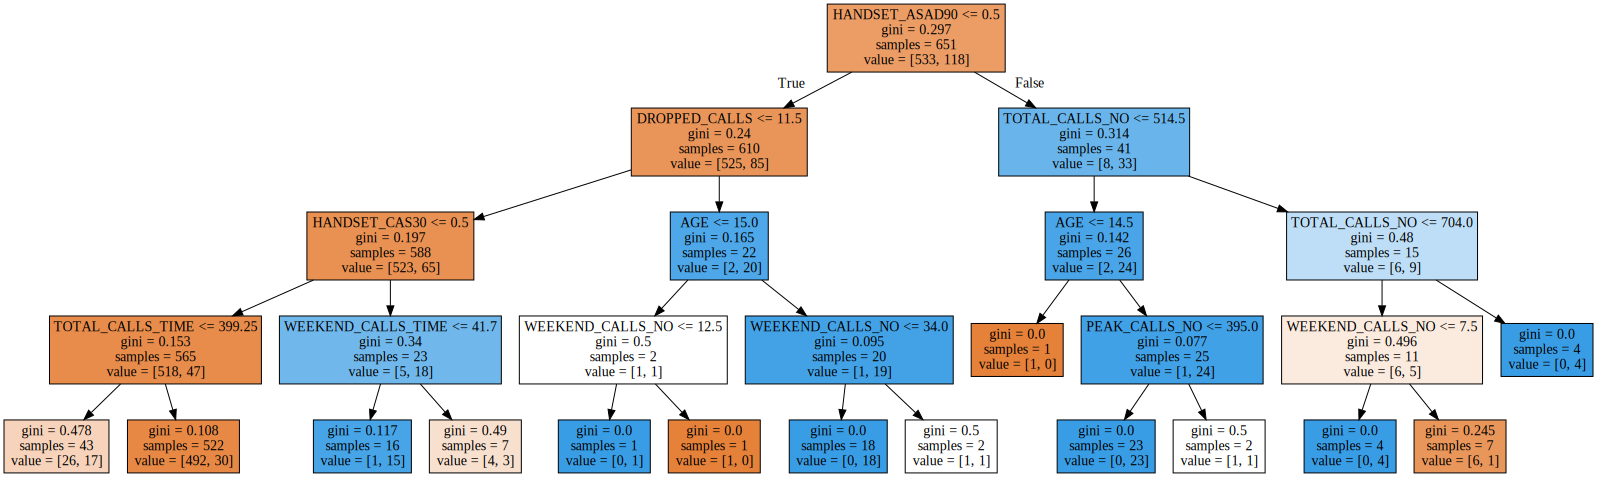

In [102]:
v_feature_name = df_train_x.columns


# 노드의 최소 자료수=8 모델
tree_graph=DecisionTreeClassifier(random_state=1234,max_depth=4)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file="tree_depth.dot", feature_names=v_feature_name, impurity=True, filled=True)

with open("tree_depth.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

##### min_samples_split 정하기

In [103]:
train_accuracy =[]; test_accuracy=[]

para_split = [n_split*10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    tree=DecisionTreeClassifier(max_depth=4,
                                min_samples_split=v_min_samples_split,random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split['Split']=para_split
df_accuracy_split['TrainAccuracy']=train_accuracy
df_accuracy_split['TestAccuracy']=test_accuracy

df_accuracy_split.round(3)

,Split,TrainAccuracy,TestAccuracy
0,10,0.916,0.835
1,20,0.908,0.839
2,30,0.905,0.867
3,40,0.905,0.867
4,50,0.905,0.867
5,60,0.905,0.867
6,70,0.905,0.867
7,80,0.905,0.867
8,90,0.905,0.867
9,100,0.905,0.867


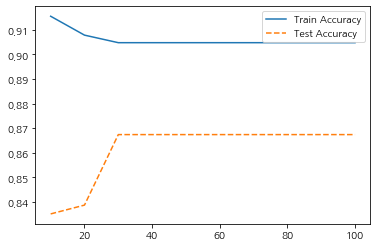

In [104]:
plt.plot(para_split, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle="--", label="Test Accuracy")
plt.legend()

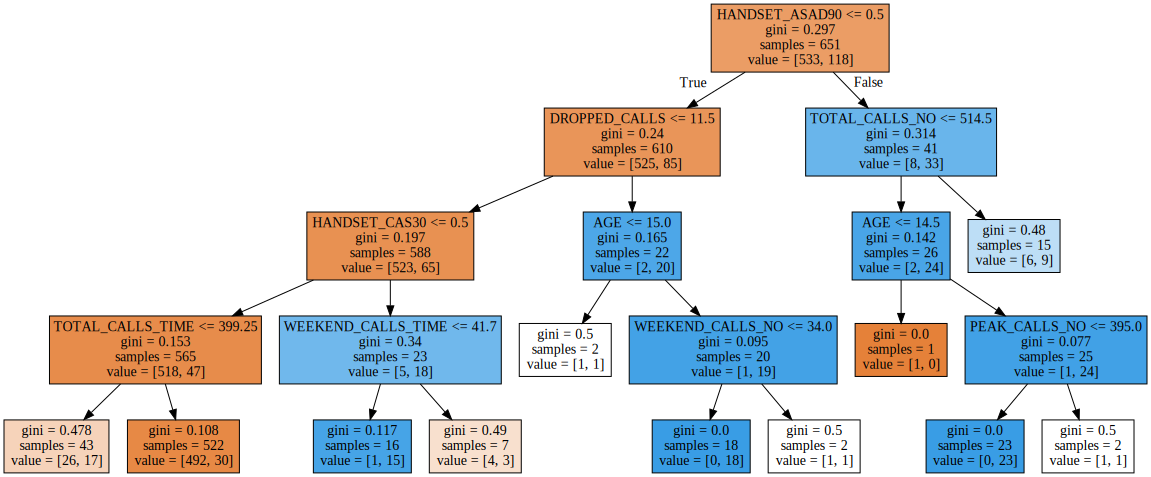

In [105]:
v_feature_name = df_train_x.columns


# 노드의 최소 자료수=8 모델
tree_graph=DecisionTreeClassifier(random_state=1234,max_depth=4,
                                 min_samples_split=20)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file="tree_split.dot", feature_names=v_feature_name, impurity=True, filled=True)

with open("tree_split.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

##### min_samples_leaf정하기

In [106]:
train_accuracy =[]; test_accuracy=[]

para_leaf = [n_leaf*2 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    tree=DecisionTreeClassifier(max_depth=4,
                                min_samples_split=20,
                                min_samples_leaf=v_min_samples_leaf
                                ,random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['Leaf']=para_leaf
df_accuracy_leaf['TrainAccuracy']=train_accuracy
df_accuracy_leaf['TestAccuracy']=test_accuracy

df_accuracy_leaf.round(3)

,Leaf,TrainAccuracy,TestAccuracy
0,2,0.906,0.842
1,4,0.906,0.849
2,6,0.906,0.849
3,8,0.905,0.867
4,10,0.905,0.867
5,12,0.905,0.867
6,14,0.905,0.867
7,16,0.905,0.867
8,18,0.905,0.867
9,20,0.905,0.867


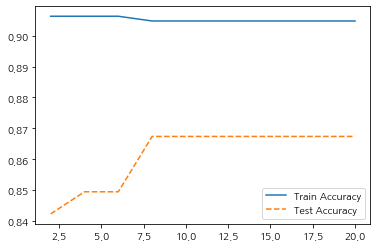

In [107]:
plt.plot(para_leaf, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle="--", label="Test Accuracy")
plt.legend()

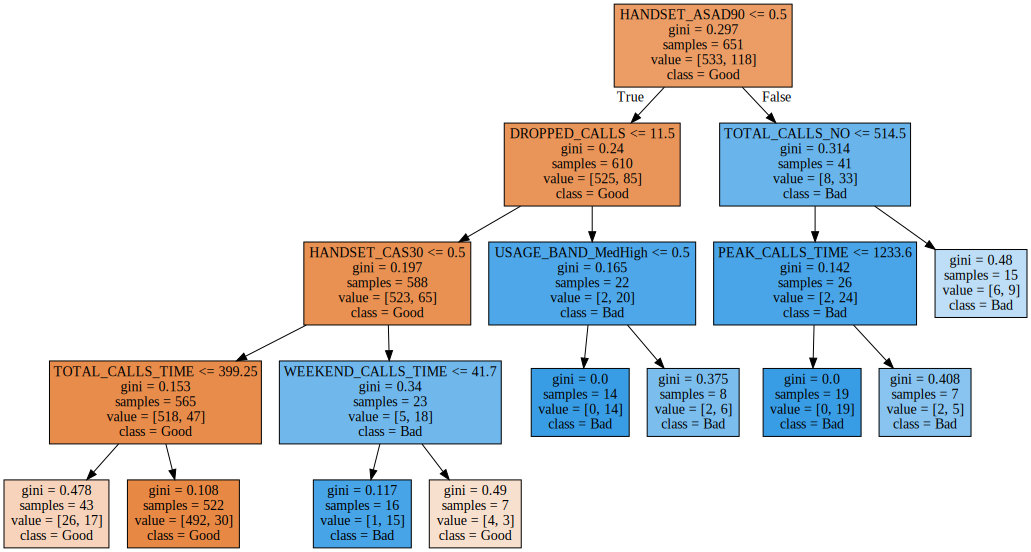

In [108]:
v_feature_name = df_train_x.columns


# 노드의 최소 자료수=8 모델
tree_graph=DecisionTreeClassifier(random_state=1234,max_depth=4,
                                 min_samples_split=20,
                                 min_samples_leaf=3)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file="tree_low.dot", feature_names=v_feature_name, impurity=True, filled=True,
               class_names=['Good','Bad'])

with open("tree_low.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

##### 최종 모델 선정

In [109]:
tree_final = DecisionTreeClassifier(max_depth=4, min_samples_split=20,
                                   min_samples_leaf=3, random_state=1234)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1234, splitter='best')

최종 모델 시각화

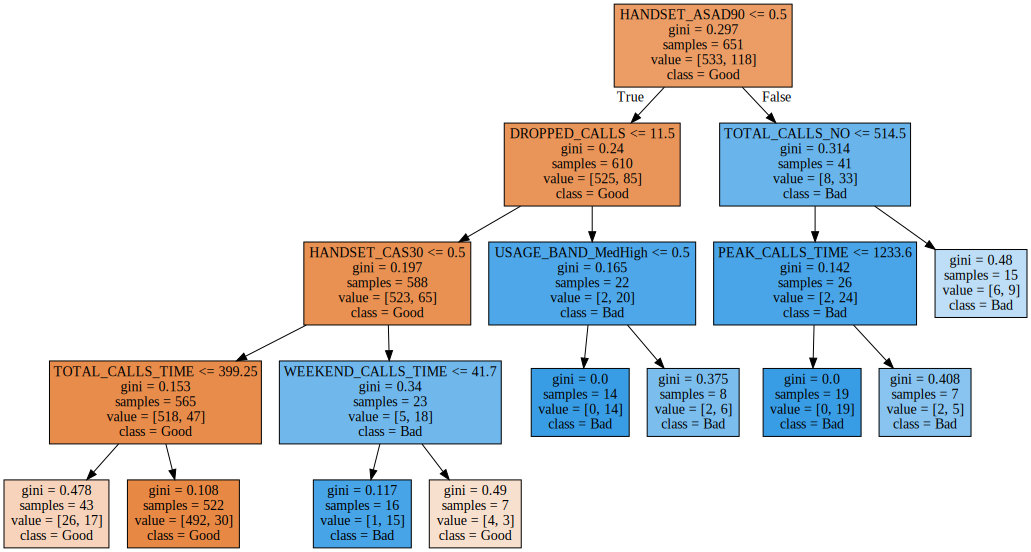

In [110]:

export_graphviz(tree_final, out_file="tree_final.dot", feature_names=v_feature_name, impurity=True, filled=True,
               class_names=['Good','Bad'])

with open("tree_final.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

##### 최종 모델 평가

In [111]:
y_pred = tree_final.predict(df_test_x)
print("Accuracy:{0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Confusion matrix :\n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy:0.849

Confusion matrix :
[[214   3]
 [ 39  23]]


설명변수의 중요도 확인하기


In [112]:
df_train_x.columns

Index(['AGE', 'SERVICE_DURATION', 'DROPPED_CALLS', 'PEAK_CALLS_NO',
       'PEAK_CALLS_TIME', 'WEEKEND_CALLS_NO', 'WEEKEND_CALLS_TIME',
       'TOTAL_CALLS_NO', 'TOTAL_CALLS_TIME', 'GENDER_F', 'GENDER_M',
       'CHARGE_TYPE_CAT 100', 'CHARGE_TYPE_CAT 200', 'CHARGE_TYPE_CAT 50',
       'CHARGE_TYPE_Play 100', 'CHARGE_TYPE_Play 300', 'HANDSET_ASAD170',
       'HANDSET_ASAD90', 'HANDSET_BS110', 'HANDSET_BS210', 'HANDSET_CAS30',
       'HANDSET_CAS60', 'HANDSET_S50', 'HANDSET_S80', 'HANDSET_SOP10',
       'HANDSET_SOP20', 'HANDSET_WC95', 'USAGE_BAND_High', 'USAGE_BAND_Low',
       'USAGE_BAND_Med', 'USAGE_BAND_MedHigh', 'USAGE_BAND_MedLow',
       'USAGE_BAND_None'],
      dtype='object')

<Figure size 1800x1800 with 0 Axes>

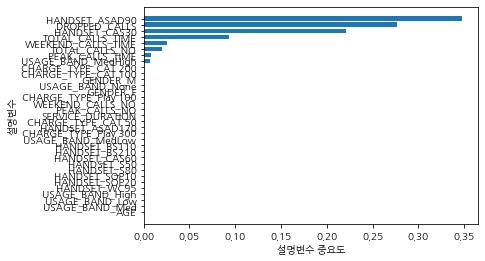

<Figure size 1800x1800 with 0 Axes>

In [116]:
df_importance=pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance']=tree_final.feature_importances_

df_importance.sort_values("Importance", ascending=True, inplace=True)
corrdinates =range(len(df_importance))
plt.barh(y=corrdinates, width = df_importance['Importance'])
plt.yticks (corrdinates, df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')
plt.figure(figsize=(25,25))

Entropy 사용

In [117]:
df_raw = pd.read_csv("../data/BigData/통신고객이탈.csv", engine = "python", encoding = "EUC-KR")
df_raw.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [118]:
df_raw["CHURN"] = np.where(df_raw["CHURN"] == "Active", 0, 1)
df_raw.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,0,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,0,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,0,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,0,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,0,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [119]:
df_raw_x= df_raw.drop(['CHURN', 'CUSTOMER_ID'], axis= 1, inplace= False)

df_raw_dummy= pd.get_dummies(df_raw_x)

df_raw_dummy.head()

,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,GENDER_F,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,31,33.33,6,218,379.8,9,21.6,366,632.4,1,...,0,0,0,0,0,0,1,0,0,0
1,27,30.87,10,373,656.4,11,28.0,411,810.4,0,...,0,0,0,0,0,0,1,0,0,0
2,27,49.40,11,260,582.0,0,0.0,265,614.1,0,...,0,0,0,0,0,0,1,0,0,0
3,61,48.60,1,294,661.8,14,101.5,326,844.0,0,...,0,0,0,0,0,0,1,0,0,0
4,52,56.03,0,221,555.6,7,25.0,274,673.0,1,...,0,0,0,0,0,0,1,0,0,0


In [120]:
len(df_raw_dummy.columns)

33

In [121]:
dr_raw_y=df_raw['CHURN']

#### Data 나누기

In [122]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_dummy, dr_raw_y, test_size=0.3, random_state=88)
print("train size is {}".format(df_train_x.shape))
print("test size is {}".format(df_test_x.shape))

print("test size is {}".format(df_test_y.shape))

train size is (651, 33)
test size is (279, 33)
test size is (279,)


In [123]:
tree_uncustomized

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1234, splitter='best')

In [124]:
tree_uncustomized =  DecisionTreeClassifier(random_state=1234, criterion='entropy')
tree_uncustomized.fit(df_train_x,df_train_y)

print("Accuracy on training set : {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set : {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set : 1.000
Accuracy on test set : 0.824


##### Depth 정하기

In [125]:
train_accuracy =[]; test_accuracy=[]

para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree=DecisionTreeClassifier(max_depth=v_max_depth,  criterion='entropy',random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth']=para_depth
df_accuracy_depth['TrainAccuracy']=train_accuracy
df_accuracy_depth['TestAccuracy']=test_accuracy

df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.857,0.817
1,2,0.885,0.846
2,3,0.905,0.867
3,4,0.905,0.853
4,5,0.925,0.864
5,6,0.937,0.846
6,7,0.946,0.853
7,8,0.965,0.864
8,9,0.977,0.821
9,10,0.991,0.817


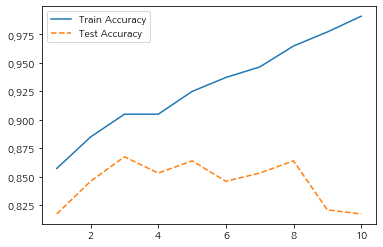

In [126]:
plt.plot(para_depth, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle="--", label="Test Accuracy")
plt.legend()

depth는 4로 결정

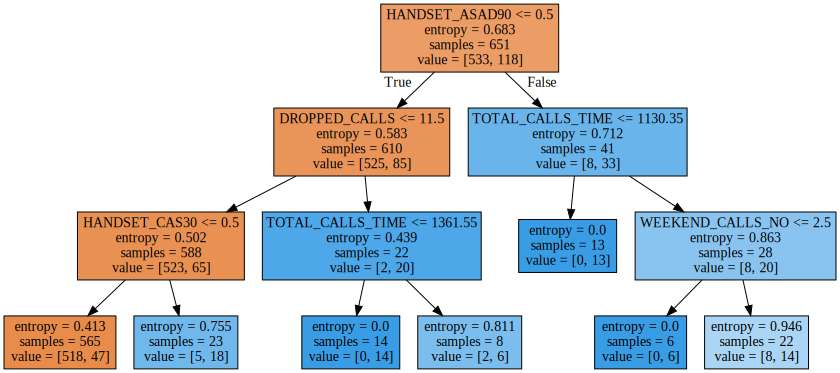

In [128]:
v_feature_name = df_train_x.columns


# 노드의 최소 자료수=8 모델
tree_graph=DecisionTreeClassifier(random_state=1234, criterion='entropy',max_depth=3)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file="tree_depth.dot", feature_names=v_feature_name, impurity=True, filled=True)

with open("tree_depth.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

##### min_samples_split 정하기

In [132]:
train_accuracy =[]; test_accuracy=[]

para_split = [n_split*10 for n_split in range(1,20)]

for v_min_samples_split in para_split:
    tree=DecisionTreeClassifier(max_depth=3, criterion='entropy',
                                min_samples_split=v_min_samples_split,random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split['Split']=para_split
df_accuracy_split['TrainAccuracy']=train_accuracy
df_accuracy_split['TestAccuracy']=test_accuracy

df_accuracy_split.round(3)

,Split,TrainAccuracy,TestAccuracy
0,10,0.905,0.867
1,20,0.905,0.867
2,30,0.905,0.867
3,40,0.905,0.867
4,50,0.905,0.867
5,60,0.905,0.867
6,70,0.905,0.867
7,80,0.905,0.867
8,90,0.905,0.867
9,100,0.905,0.867


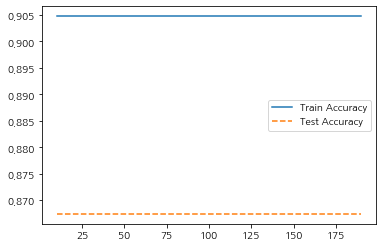

In [133]:
plt.plot(para_split, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle="--", label="Test Accuracy")
plt.legend()

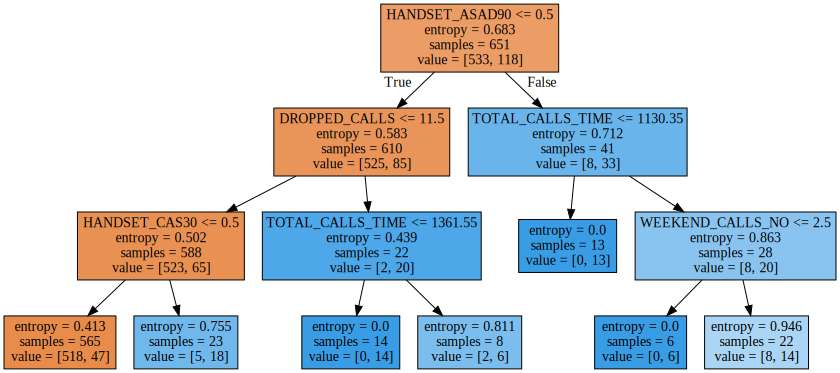

In [134]:
v_feature_name = df_train_x.columns


# 노드의 최소 자료수=8 모델
tree_graph=DecisionTreeClassifier(random_state=1234,max_depth=3, criterion='entropy',
                                 min_samples_split=20)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file="tree_split.dot", feature_names=v_feature_name, impurity=True, filled=True)

with open("tree_split.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

##### min_samples_leaf정하기

In [137]:
train_accuracy =[]; test_accuracy=[]

para_leaf = [n_leaf*2 for n_leaf in range(1,50)]

for v_min_samples_leaf in para_leaf:
    tree=DecisionTreeClassifier(max_depth=3,
                                min_samples_split=20,
                                 criterion='entropy',
                                min_samples_leaf=v_min_samples_leaf
                                ,random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['Leaf']=para_leaf
df_accuracy_leaf['TrainAccuracy']=train_accuracy
df_accuracy_leaf['TestAccuracy']=test_accuracy

df_accuracy_leaf.round(3)

,Leaf,TrainAccuracy,TestAccuracy
0,2,0.905,0.867
1,4,0.905,0.867
2,6,0.905,0.867
3,8,0.905,0.867
4,10,0.905,0.867
5,12,0.905,0.867
6,14,0.905,0.867
7,16,0.905,0.867
8,18,0.905,0.867
9,20,0.905,0.867


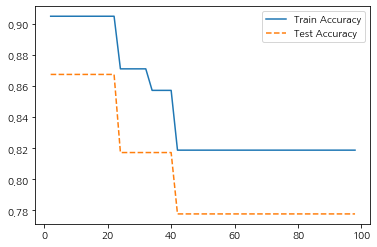

In [138]:
plt.plot(para_leaf, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle="--", label="Test Accuracy")
plt.legend()

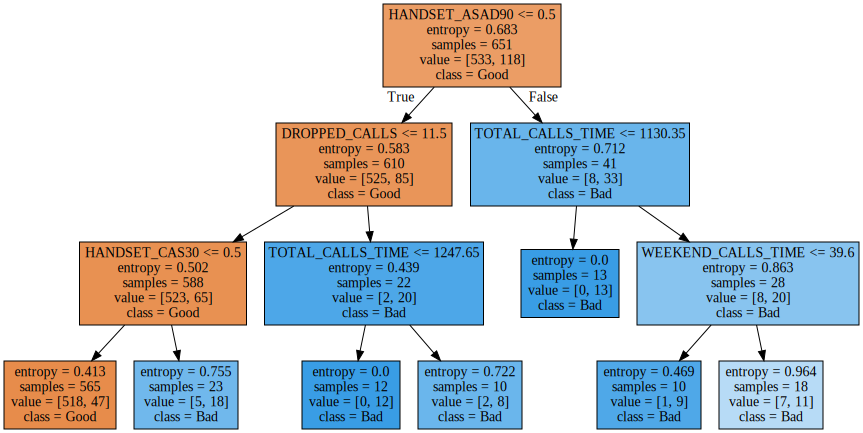

In [139]:
v_feature_name = df_train_x.columns


# 노드의 최소 자료수=8 모델
tree_graph=DecisionTreeClassifier(random_state=1234,max_depth=3,
                                   criterion='entropy',
                                 min_samples_split=20,
                                 min_samples_leaf=10)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file="tree_low.dot", feature_names=v_feature_name, impurity=True, filled=True,
               class_names=['Good','Bad'])

with open("tree_low.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

##### 최종 모델 선정

In [140]:
tree_final = DecisionTreeClassifier(max_depth=3, min_samples_split=20,
                                   min_samples_leaf=10, criterion='entropy', random_state=1234)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1234, splitter='best')

최종 모델 시각화

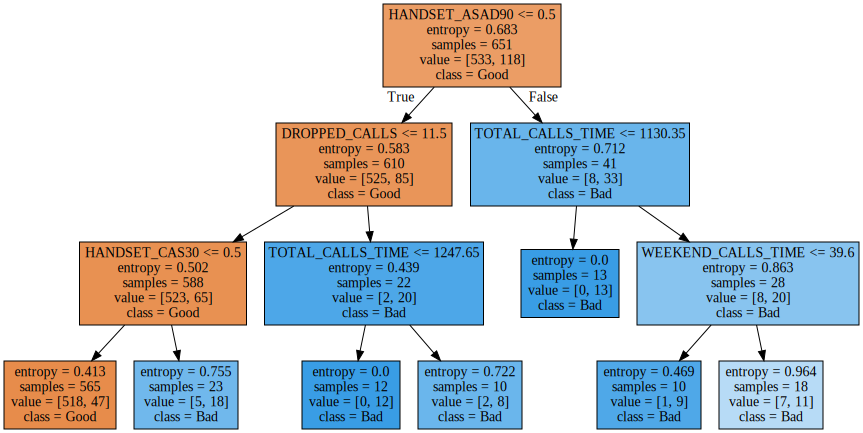

In [141]:

export_graphviz(tree_final, out_file="tree_final.dot", feature_names=v_feature_name, impurity=True, filled=True,
               class_names=['Good','Bad'])

with open("tree_final.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

##### 최종 모델 평가

In [142]:
y_pred = tree_final.predict(df_test_x)
print("Accuracy:{0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Confusion matrix :\n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy:0.867

Confusion matrix :
[[211   6]
 [ 31  31]]


설명변수의 중요도 확인하기


In [112]:
df_train_x.columns

Index(['AGE', 'SERVICE_DURATION', 'DROPPED_CALLS', 'PEAK_CALLS_NO',
       'PEAK_CALLS_TIME', 'WEEKEND_CALLS_NO', 'WEEKEND_CALLS_TIME',
       'TOTAL_CALLS_NO', 'TOTAL_CALLS_TIME', 'GENDER_F', 'GENDER_M',
       'CHARGE_TYPE_CAT 100', 'CHARGE_TYPE_CAT 200', 'CHARGE_TYPE_CAT 50',
       'CHARGE_TYPE_Play 100', 'CHARGE_TYPE_Play 300', 'HANDSET_ASAD170',
       'HANDSET_ASAD90', 'HANDSET_BS110', 'HANDSET_BS210', 'HANDSET_CAS30',
       'HANDSET_CAS60', 'HANDSET_S50', 'HANDSET_S80', 'HANDSET_SOP10',
       'HANDSET_SOP20', 'HANDSET_WC95', 'USAGE_BAND_High', 'USAGE_BAND_Low',
       'USAGE_BAND_Med', 'USAGE_BAND_MedHigh', 'USAGE_BAND_MedLow',
       'USAGE_BAND_None'],
      dtype='object')

<Figure size 1800x1800 with 0 Axes>

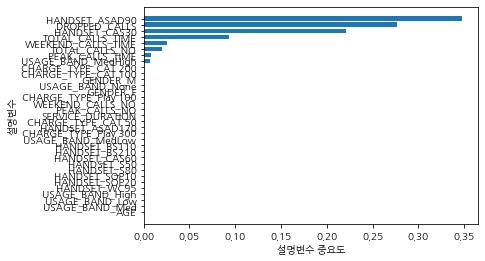

<Figure size 1800x1800 with 0 Axes>

In [116]:
df_importance=pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance']=tree_final.feature_importances_

df_importance.sort_values("Importance", ascending=True, inplace=True)
corrdinates =range(len(df_importance))
plt.barh(y=corrdinates, width = df_importance['Importance'])
plt.yticks (corrdinates, df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')
plt.figure(figsize=(25,25))

# 02. RandomForest


In [14]:
df_raw = pd.read_csv("../data/BigData/통신고객이탈.csv", engine = "python", encoding = "EUC-KR")
df_raw.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [15]:
df_raw["CHURN"] = np.where(df_raw["CHURN"] == "Active", 0, 1)
df_raw.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,0,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,0,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,0,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,0,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,0,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [16]:
df_raw_x= df_raw.drop(['CHURN', 'CUSTOMER_ID'], axis= 1, inplace= False)

df_raw_dummy= pd.get_dummies(df_raw_x)

df_raw_dummy.head()

,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,GENDER_F,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,31,33.33,6,218,379.8,9,21.6,366,632.4,1,...,0,0,0,0,0,0,1,0,0,0
1,27,30.87,10,373,656.4,11,28.0,411,810.4,0,...,0,0,0,0,0,0,1,0,0,0
2,27,49.40,11,260,582.0,0,0.0,265,614.1,0,...,0,0,0,0,0,0,1,0,0,0
3,61,48.60,1,294,661.8,14,101.5,326,844.0,0,...,0,0,0,0,0,0,1,0,0,0
4,52,56.03,0,221,555.6,7,25.0,274,673.0,1,...,0,0,0,0,0,0,1,0,0,0


In [17]:
len(df_raw_dummy.columns)

33

In [18]:
dr_raw_y=df_raw['CHURN']

#### Data 나누기

In [19]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_dummy, dr_raw_y, test_size=0.3, random_state=88)
print("train size is {}".format(df_train_x.shape))
print("test size is {}".format(df_test_x.shape))

print("test size is {}".format(df_test_y.shape))

train size is (651, 33)
test size is (279, 33)
test size is (279,)


In [22]:
tree_uncustomized =  RandomForestClassifier(random_state=1234)
tree_uncustomized.fit(df_train_x,df_train_y)

print("Accuracy on training set : {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set : {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set : 0.988
Accuracy on test set : 0.857


##### n_estimator 정하기

In [23]:
train_accuracy =[]; test_accuracy=[]

para_n_tree = [n_tree*10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    tree=RandomForestClassifier(n_estimators=v_n_estimators, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n['n_estimators']=para_n_tree
df_accuracy_n['TrainAccuracy']=train_accuracy
df_accuracy_n['TestAccuracy']=test_accuracy

df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy
0,10,0.988,0.857
1,20,0.998,0.878
2,30,1.000,0.882
3,40,1.000,0.875
4,50,1.000,0.875
5,60,1.000,0.871
6,70,1.000,0.875
7,80,1.000,0.871
8,90,1.000,0.867
9,100,1.000,0.864


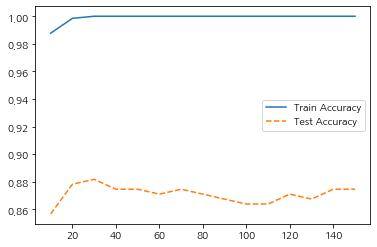

In [24]:
plt.plot(para_n_tree, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle="--", label="Test Accuracy")
plt.legend()

n_estimators : 트리 수 변경에 따른 모델 oob error 변화

In [25]:
oob_error=[]

for v_n_estimator in range(1,151):
    rf = RandomForestClassifier(n_estimators=v_n_estimator, oob_score=True, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1-rf.oob_score_)

Text(0.5, 0, 'n_estimators')

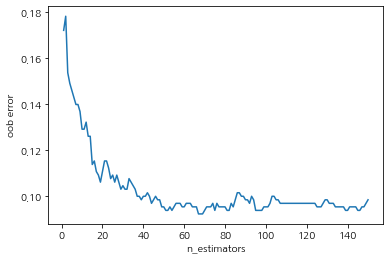

In [26]:
plt.plot(range(1,151), oob_error)
plt.ylabel("oob error")
plt.xlabel('n_estimators')


    생성하는 결정 트리 수 증가에 따라 모델의 정확도는 증가하며 OOB Error는 감소,
    모델의 특성을 고려하여 50 선택(자료가 많은 경우에는 트리 수를 늘릴 수 있음)

In [28]:
n_estimator=50

##### Depth 정하기

In [38]:
train_accuracy =[]; test_accuracy=[]

para_depth = [depth for depth in range(1,21)]

for v_max_depth in para_depth:
    tree=RandomForestClassifier(n_estimators=n_estimator,max_depth=v_max_depth, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth']=para_depth
df_accuracy_depth['TrainAccuracy']=train_accuracy
df_accuracy_depth['TestAccuracy']=test_accuracy

df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.819,0.778
1,2,0.819,0.778
2,3,0.848,0.792
3,4,0.886,0.817
4,5,0.908,0.814
5,6,0.943,0.839
6,7,0.949,0.860
7,8,0.951,0.875
8,9,0.957,0.864
9,10,0.962,0.871


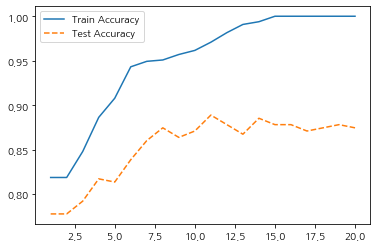

In [39]:
plt.plot(para_depth, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle="--", label="Test Accuracy")
plt.legend()

    최대 깊이 증가에 따라 모델의 정확도는 증가하며 Train/Test 데이터의 성능 변화를 고려하여 20 선택

##### min_samples_split 정하기

In [40]:
train_accuracy =[]; test_accuracy=[]

para_split = [n_split*10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    tree=RandomForestClassifier(n_estimators=n_estimator,max_depth=8,
                                min_samples_split=v_min_samples_split,random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split['Split']=para_split
df_accuracy_split['TrainAccuracy']=train_accuracy
df_accuracy_split['TestAccuracy']=test_accuracy

df_accuracy_split.round(3)

,Split,TrainAccuracy,TestAccuracy
0,10,0.945,0.867
1,20,0.917,0.871
2,30,0.909,0.871
3,40,0.908,0.871
4,50,0.908,0.871
5,60,0.908,0.871
6,70,0.909,0.871
7,80,0.909,0.871
8,90,0.909,0.871
9,100,0.909,0.871


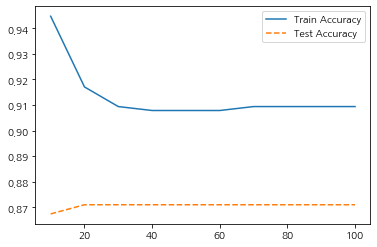

In [41]:
plt.plot(para_split, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle="--", label="Test Accuracy")
plt.legend()

    분리 노드의 최소 자료 수 증가에 따라 모델의 정확도는 감소하나 test 데이터의 성능 변화를 고려하면 20일때 최소 간격을 갖게 되므로 20을 선택

##### min_samples_leaf정하기

In [42]:
train_accuracy =[]; test_accuracy=[]

para_leaf = [n_leaf*10 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    tree=RandomForestClassifier(n_estimators=n_estimator,max_depth=8,
                                min_samples_split=20,
                                min_samples_leaf=v_min_samples_leaf
                                ,random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['Leaf']=para_leaf
df_accuracy_leaf['TrainAccuracy']=train_accuracy
df_accuracy_leaf['TestAccuracy']=test_accuracy

df_accuracy_leaf.round(3)

,Leaf,TrainAccuracy,TestAccuracy
0,10,0.906,0.839
1,20,0.856,0.810
2,30,0.819,0.778
3,40,0.819,0.778
4,50,0.819,0.778
5,60,0.819,0.778
6,70,0.819,0.778
7,80,0.819,0.778
8,90,0.819,0.778
9,100,0.819,0.778


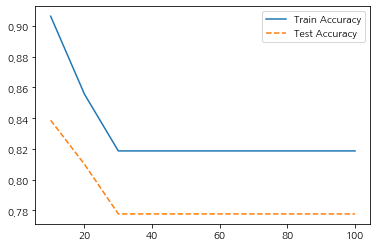

In [43]:
plt.plot(para_leaf, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle="--", label="Test Accuracy")
plt.legend()

    잎사귀 노드 최소 자료 수 증가에 따라 모델의 정확도는 감소하며
    Train/Test 데이터의 성능 변화를 고려하여 10 선택

In [44]:
rf_final = RandomForestClassifier(n_estimators=n_estimator,max_depth=8, min_samples_split=20,
                                   min_samples_leaf=10, random_state=1234)
rf_final.fit(df_train_x, df_train_y)

y_pred = rf_final.predict(df_test_x)

print("Accuracy on training set : {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Accuracy on test set : {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

print("Confusion matrix : \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set : 0.906
Accuracy on test set : 0.839
Confusion matrix : 
[[214   3]
 [ 42  20]]


train/test 데이터의 정분류율이 비슷한 수준(**84.6%**)으로 안정적인 모델임을 확인할 수 있음

In [36]:
v_feature_name = df_train_x.columns

df_importance=pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance']=rf_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
17,HANDSET_ASAD90,0.230
2,DROPPED_CALLS,0.210
20,HANDSET_CAS30,0.100
8,TOTAL_CALLS_TIME,0.078
4,PEAK_CALLS_TIME,0.059
7,TOTAL_CALLS_NO,0.052
1,SERVICE_DURATION,0.043
0,AGE,0.041
3,PEAK_CALLS_NO,0.038
6,WEEKEND_CALLS_TIME,0.021


Text(0, 0.5, '설명변수')

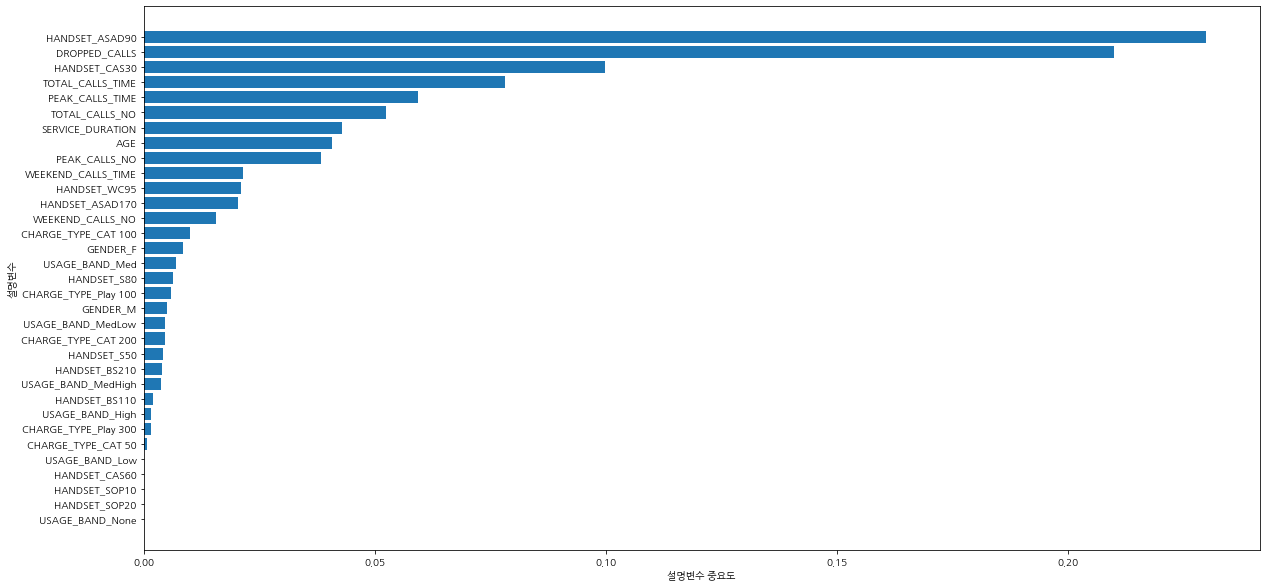

In [55]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates, width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("설명변수 중요도")
plt.ylabel('설명변수')

    중요 설명변수 : HANDSET_ASAD90

# Gradient Boosting

In [56]:
df_raw = pd.read_csv("../data/BigData/통신고객이탈.csv", engine = "python", encoding = "EUC-KR")
df_raw.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [57]:
df_raw["CHURN"] = np.where(df_raw["CHURN"] == "Active", 0, 1)
df_raw.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,0,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,0,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,0,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,0,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,0,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [58]:
df_raw_x= df_raw.drop(['CHURN', 'CUSTOMER_ID'], axis= 1, inplace= False)

df_raw_dummy= pd.get_dummies(df_raw_x)

df_raw_dummy.head()

,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,GENDER_F,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,31,33.33,6,218,379.8,9,21.6,366,632.4,1,...,0,0,0,0,0,0,1,0,0,0
1,27,30.87,10,373,656.4,11,28.0,411,810.4,0,...,0,0,0,0,0,0,1,0,0,0
2,27,49.40,11,260,582.0,0,0.0,265,614.1,0,...,0,0,0,0,0,0,1,0,0,0
3,61,48.60,1,294,661.8,14,101.5,326,844.0,0,...,0,0,0,0,0,0,1,0,0,0
4,52,56.03,0,221,555.6,7,25.0,274,673.0,1,...,0,0,0,0,0,0,1,0,0,0


In [59]:
dr_raw_y=df_raw['CHURN']

#### Data 나누기

In [60]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_dummy, dr_raw_y, test_size=0.3, random_state=88)
print("train size is {}".format(df_train_x.shape))
print("test size is {}".format(df_test_x.shape))

print("test size is {}".format(df_test_y.shape))

train size is (651, 33)
test size is (279, 33)
test size is (279,)


In [63]:
tree_uncustomized =  GradientBoostingClassifier(random_state=1234)
tree_uncustomized.fit(df_train_x,df_train_y)

print("Accuracy on training set : {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set : {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set : 0.975
Accuracy on test set : 0.875


learning rate : 학습률 변경에 따른 모델 성능

In [66]:
train_accuracy = []; test_accuracy=[]

para_lr = [lr*0.1 for lr in range(1,10)]

for v_learning_rate in para_lr:
    gb=GradientBoostingClassifier(learning_rate=v_learning_rate, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
df_accuracy_lr = pd.DataFrame()
df_accuracy_lr['LearningRate']=para_lr
df_accuracy_lr['TrainAccuracy']=train_accuracy
df_accuracy_lr['TestAccuracy']=test_accuracy

df_accuracy_lr.round(3)

,LearningRate,TrainAccuracy,TestAccuracy
0,0.1,0.975,0.875
1,0.2,1.000,0.871
2,0.3,1.000,0.857
3,0.4,1.000,0.867
4,0.5,1.000,0.864
5,0.6,1.000,0.871
6,0.7,1.000,0.867
7,0.8,1.000,0.875
8,0.9,1.000,0.864


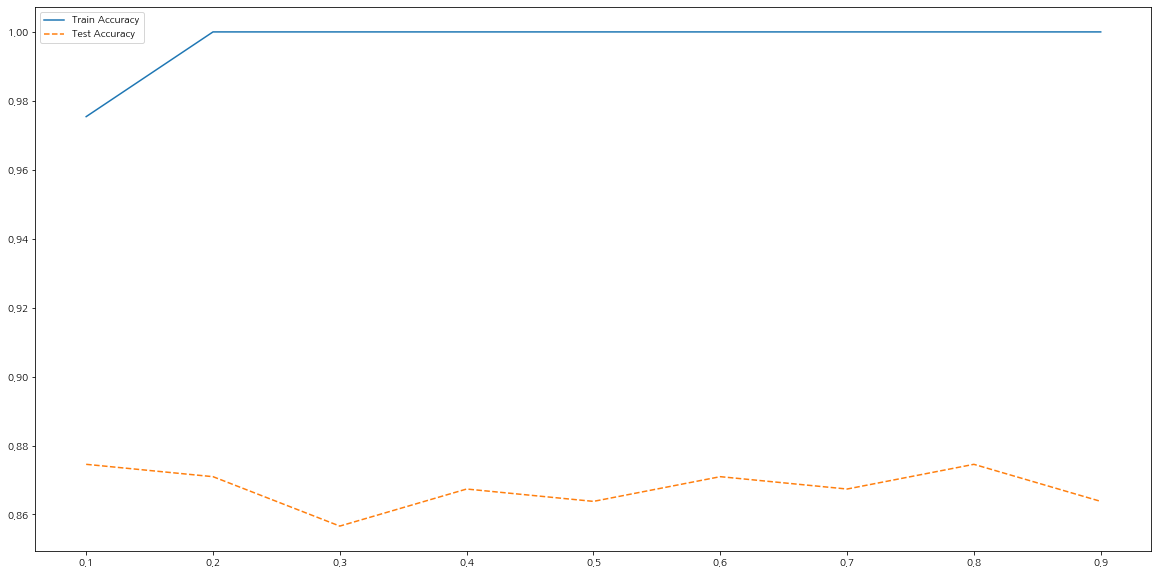

In [67]:
plt.plot(para_lr, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_lr, test_accuracy, linestyle="--", label="Test Accuracy")
plt.legend()

    learning rate가 0.2이상일 때 train score가 안정되기 때문에 0.21 선택(자료가 많은 경우에는 트리 수를 늘릴 수 있음)

##### n_estimator 정하기

In [68]:
train_accuracy =[]; test_accuracy=[]

para_n_tree = [n_tree*10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    tree=GradientBoostingClassifier(learning_rate=0.21,n_estimators=v_n_estimators, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n['n_estimators']=para_n_tree
df_accuracy_n['TrainAccuracy']=train_accuracy
df_accuracy_n['TestAccuracy']=test_accuracy

df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy
0,10,0.934,0.860
1,20,0.952,0.882
2,30,0.963,0.889
3,40,0.966,0.892
4,50,0.980,0.885
5,60,0.985,0.885
6,70,0.992,0.885
7,80,0.997,0.878
8,90,0.997,0.878
9,100,1.000,0.889


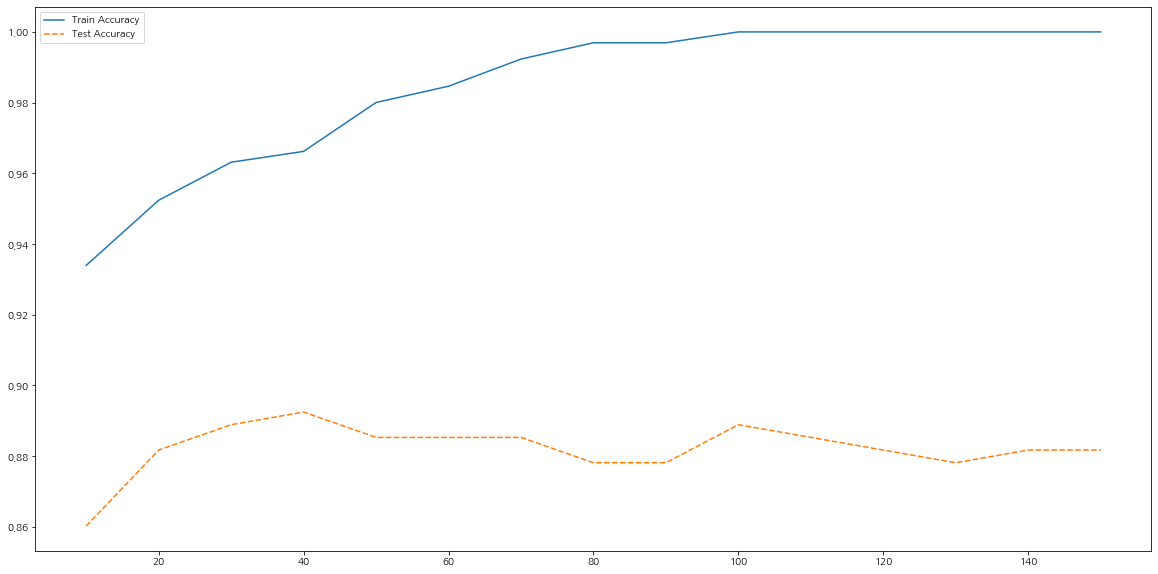

In [69]:
plt.plot(para_n_tree, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle="--", label="Test Accuracy")
plt.legend()

    모델의 특성을 고려하여 100 선택(자료가 많은 경우에는 트리 수를 늘릴 수 있음)

##### Depth 정하기

In [70]:
train_accuracy =[]; test_accuracy=[]

para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree=GradientBoostingClassifier(learning_rate=0.21,n_estimators=100,max_depth=v_max_depth, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth']=para_depth
df_accuracy_depth['TrainAccuracy']=train_accuracy
df_accuracy_depth['TestAccuracy']=test_accuracy

df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.916,0.871
1,2,0.974,0.867
2,3,1.000,0.889
3,4,1.000,0.867
4,5,1.000,0.864
5,6,1.000,0.867
6,7,1.000,0.885
7,8,1.000,0.871
8,9,1.000,0.864
9,10,1.000,0.832


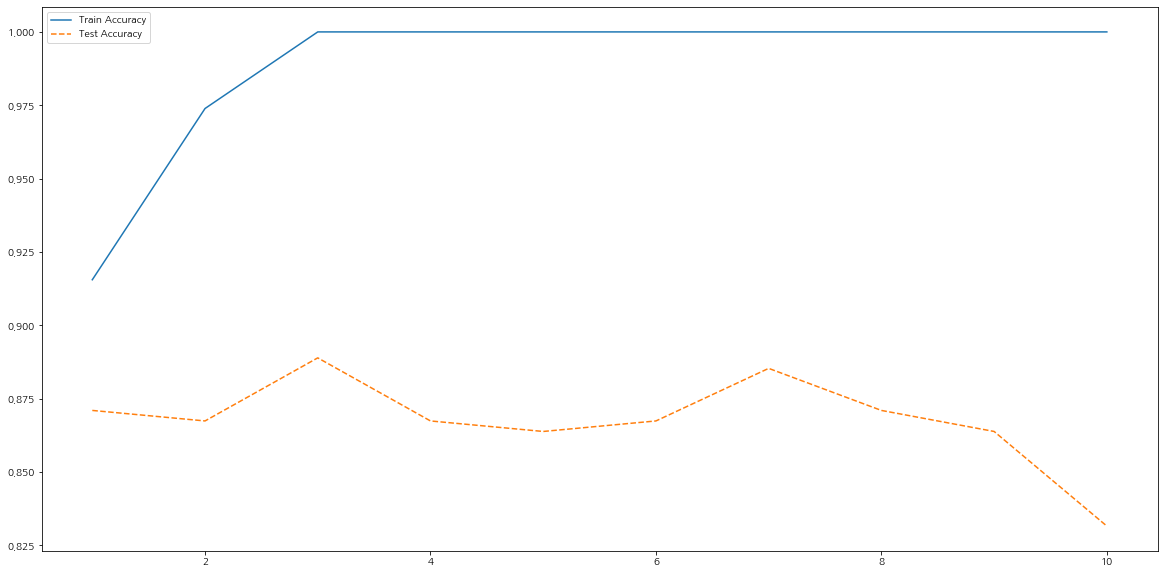

In [71]:
plt.plot(para_depth, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle="--", label="Test Accuracy")
plt.legend()

    최대 깊이 증가에 따라 모델의 정확도는 증가하며 Train/Test 데이터의 성능 변화를 고려하여 3 선택

##### min_samples_split 정하기

In [72]:
train_accuracy =[]; test_accuracy=[]

para_split = [n_split*10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    tree=GradientBoostingClassifier(learning_rate=0.21,n_estimators=100,max_depth=3,
                                min_samples_split=v_min_samples_split,random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split['Split']=para_split
df_accuracy_split['TrainAccuracy']=train_accuracy
df_accuracy_split['TestAccuracy']=test_accuracy

df_accuracy_split.round(3)

,Split,TrainAccuracy,TestAccuracy
0,10,1.000,0.871
1,20,0.998,0.882
2,30,0.994,0.871
3,40,0.994,0.867
4,50,0.991,0.867
5,60,0.989,0.860
6,70,0.992,0.885
7,80,0.992,0.871
8,90,0.989,0.875
9,100,0.982,0.882


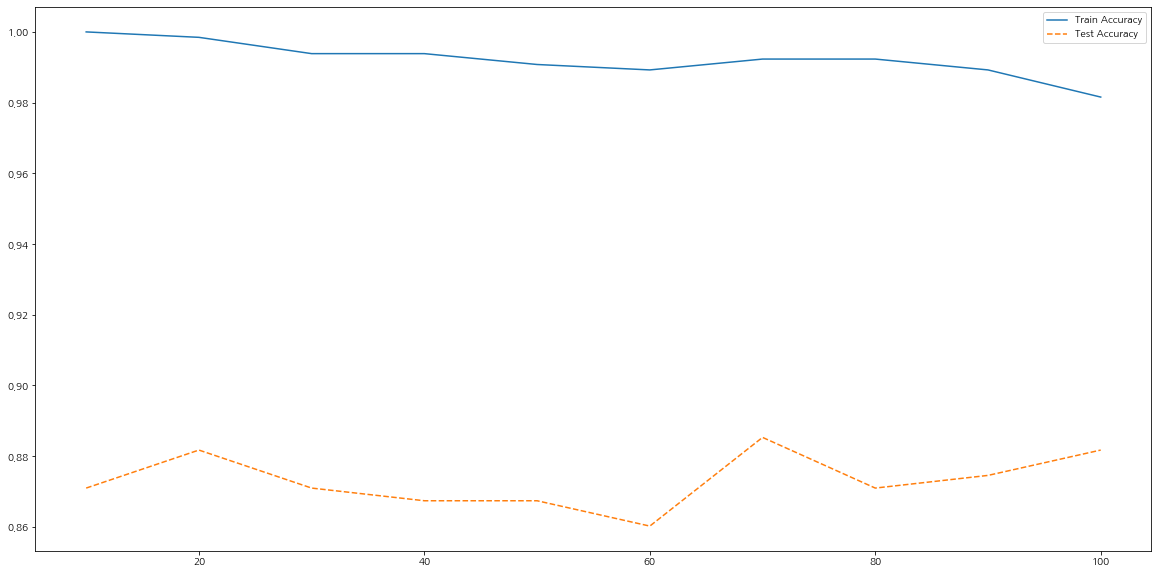

In [73]:
plt.plot(para_split, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle="--", label="Test Accuracy")
plt.legend()

    분리 노드의 최소 자료 수 증가에 따라 모델의 정확도는 차이가 존재하나 test 데이터의 성능 변화를 고려하면 20정도에서 안정성을 보여준다고 판단하여 20으로 결정함

##### min_samples_leaf정하기

In [74]:
train_accuracy =[]; test_accuracy=[]

para_leaf = [n_leaf*5 for n_leaf in range(1,7)]

for v_min_samples_leaf in para_leaf:
    tree=GradientBoostingClassifier(learning_rate=0.21,n_estimators=100,max_depth=3,
                                min_samples_split=10,
                                min_samples_leaf=v_min_samples_leaf
                                ,random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['Leaf']=para_leaf
df_accuracy_leaf['TrainAccuracy']=train_accuracy
df_accuracy_leaf['TestAccuracy']=test_accuracy

df_accuracy_leaf.round(3)

,Leaf,TrainAccuracy,TestAccuracy
0,5,1.000,0.864
1,10,0.997,0.871
2,15,0.997,0.871
3,20,0.992,0.878
4,25,0.997,0.871
5,30,0.985,0.875


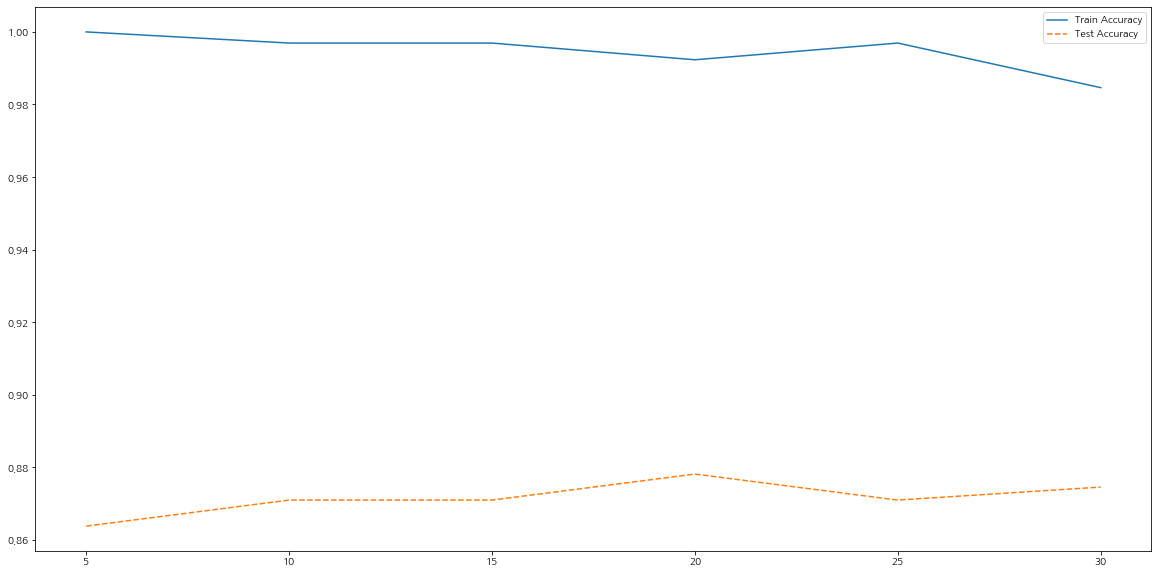

In [75]:
plt.plot(para_leaf, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle="--", label="Test Accuracy")
plt.legend()

    과적합 요소를 배제하고자 19를 선택함 (전체데이터3748개) Train/Test 데이터의 성능 변화를 고려하여 10 선택

In [54]:
df.shape

(3748, 13)

##### 최종 모델 선정

In [76]:
gb_final = GradientBoostingClassifier(learning_rate=0.21, n_estimators=100,max_depth=3, min_samples_split=20,
                                   min_samples_leaf=100, random_state=1234)
gb_final.fit(df_train_x, df_train_y)

y_pred = rf_final.predict(df_test_x)

print("Accuracy on training set : {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
print("Accuracy on test set : {:.3f}".format(gb_final.score(df_test_x, df_test_y)))

print("Confusion matrix : \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set : 0.871
Accuracy on test set : 0.796
Confusion matrix : 
[[214   3]
 [ 42  20]]


train/test 데이터의 정분류율이 비슷한 수준(**94.5%**)으로 안정적인 모델임을 확인할 수 있음

In [77]:
v_feature_name = df_train_x.columns

df_importance=pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance']=gb_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
1,SERVICE_DURATION,0.143
2,DROPPED_CALLS,0.115
4,PEAK_CALLS_TIME,0.108
8,TOTAL_CALLS_TIME,0.103
3,PEAK_CALLS_NO,0.099
0,AGE,0.088
6,WEEKEND_CALLS_TIME,0.081
7,TOTAL_CALLS_NO,0.077
5,WEEKEND_CALLS_NO,0.073
23,HANDSET_S80,0.038


Text(0, 0.5, '설명변수')

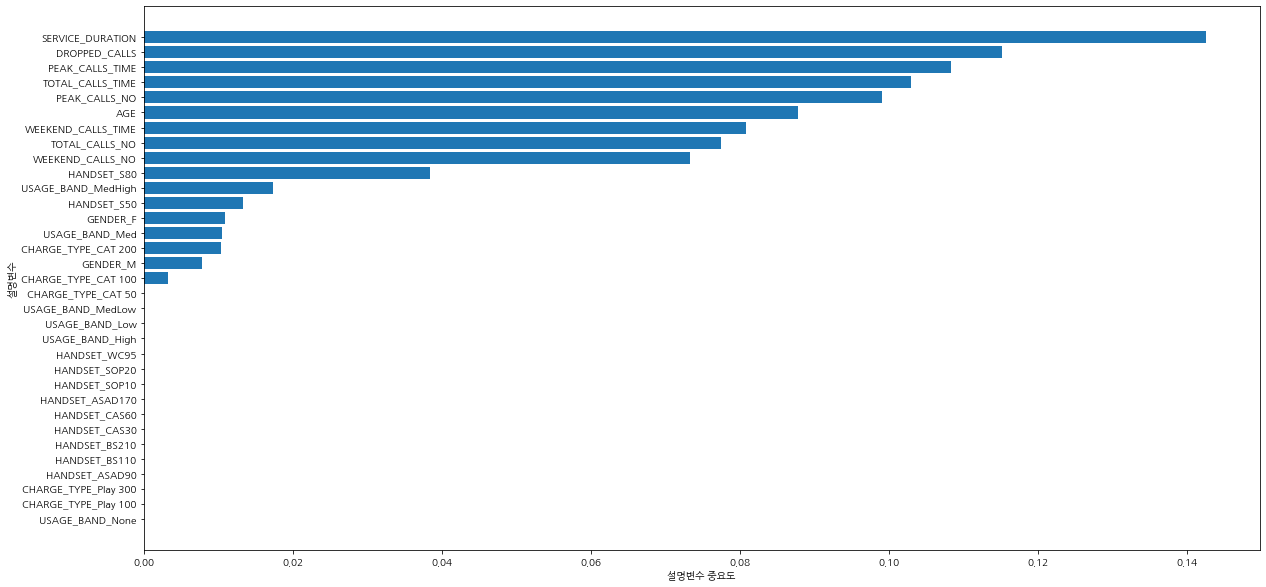

In [78]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates, width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("설명변수 중요도")
plt.ylabel('설명변수')

    중요 설명변수 : Service_Duration, Dropped_calls 순으로 중요도가 높음

# KNN

In [79]:
df_raw = pd.read_csv("../data/BigData/통신고객이탈.csv", engine = "python", encoding = "EUC-KR")
df_raw.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [80]:
df_raw["CHURN"] = np.where(df_raw["CHURN"] == "Active", 0, 1)
df_raw.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,0,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,0,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,0,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,0,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,0,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [81]:
df_raw_x= df_raw.drop(['CHURN', 'CUSTOMER_ID'], axis= 1, inplace= False)

df_raw_dummy= pd.get_dummies(df_raw_x)

df_raw_dummy.head()

,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,GENDER_F,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,31,33.33,6,218,379.8,9,21.6,366,632.4,1,...,0,0,0,0,0,0,1,0,0,0
1,27,30.87,10,373,656.4,11,28.0,411,810.4,0,...,0,0,0,0,0,0,1,0,0,0
2,27,49.40,11,260,582.0,0,0.0,265,614.1,0,...,0,0,0,0,0,0,1,0,0,0
3,61,48.60,1,294,661.8,14,101.5,326,844.0,0,...,0,0,0,0,0,0,1,0,0,0
4,52,56.03,0,221,555.6,7,25.0,274,673.0,1,...,0,0,0,0,0,0,1,0,0,0


In [82]:
dr_raw_y=df_raw['CHURN']

#### Data 나누기

In [97]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_dummy, dr_raw_y, test_size=0.3, random_state=3850)
print("train size is {}".format(df_train_x.shape))
print("test size is {}".format(df_test_x.shape))

print("test size is {}".format(df_test_y.shape))

train size is (651, 33)
test size is (279, 33)
test size is (279,)


In [98]:
knn_uncustomized = KNeighborsClassifier()
knn_uncustomized.fit(df_train_x, df_train_y)
print('Accuracy on training set:{:.3f}'.format(knn_uncustomized.score(df_train_x, df_train_y)))
print('Accuracy on test set:{:.3f}'.format(knn_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set:0.819
Accuracy on test set:0.799


In [99]:
train_accuracy=[]; test_accuracy=[]

para_n_neighbors = [i for i in range(1,16)]

for v_n_neighbors in para_n_neighbors:
    knn=KNeighborsClassifier(n_neighbors=v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))
    
df_accuracy_neighbors=pd.DataFrame()
df_accuracy_neighbors['Neighbors']=para_n_neighbors
df_accuracy_neighbors['TrainAccuracy']=train_accuracy
df_accuracy_neighbors['TestAccuracy']=test_accuracy
df_accuracy_neighbors.round(3)

,Neighbors,TrainAccuracy,TestAccuracy
0,1,1.000,0.735
1,2,0.849,0.803
2,3,0.842,0.778
3,4,0.813,0.803
4,5,0.819,0.799
5,6,0.816,0.810
6,7,0.810,0.810
7,8,0.813,0.803
8,9,0.814,0.810
9,10,0.813,0.817


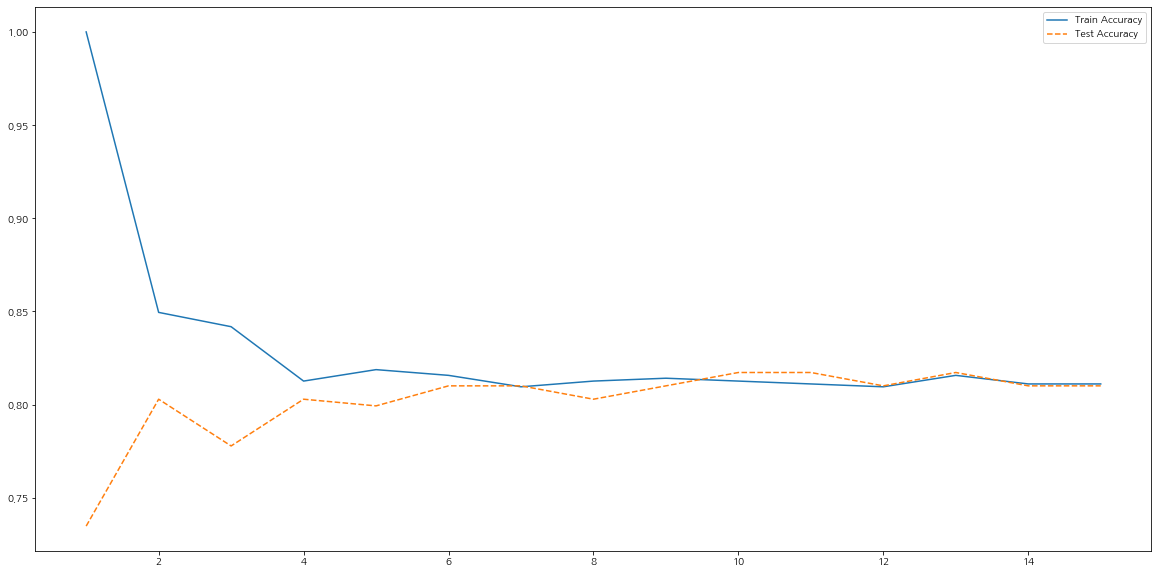

In [100]:
plt.plot(para_n_neighbors, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_n_neighbors, test_accuracy, linestyle="--", label="Test Accuracy")
plt.legend()

n의 개수가 2일때 train의 score는 급격히 감소하고 test의 score는 급격히 향상하므로 2를 선택하겠다.

In [101]:
train_accuracy=[];test_accuracy=[]

para_n_neighbors= [i for i in range(1,11)]*3
para_metric= ['minkowski']*10+['euclidean']*10 + ['manhattan']* 10
for (v_n_neighbors, v_metric) in zip(para_n_neighbors, para_metric):
    knn= KNeighborsClassifier(n_neighbors=v_n_neighbors, metric= v_metric, weights='uniform')
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

df_accuracy_metric= pd.DataFrame()
df_accuracy_metric['Neighbors']=para_n_neighbors
df_accuracy_metric['Metric']=para_metric
df_accuracy_metric['TrainAccuracy']=train_accuracy
df_accuracy_metric['TestAccuracy']=test_accuracy
df_accuracy_metric.round(3)

,Neighbors,Metric,TrainAccuracy,TestAccuracy
0,1,minkowski,1.000,0.735
1,2,minkowski,0.849,0.803
2,3,minkowski,0.842,0.778
3,4,minkowski,0.813,0.803
4,5,minkowski,0.819,0.799
5,6,minkowski,0.816,0.810
6,7,minkowski,0.810,0.810
7,8,minkowski,0.813,0.803
8,9,minkowski,0.814,0.810
9,10,minkowski,0.813,0.817


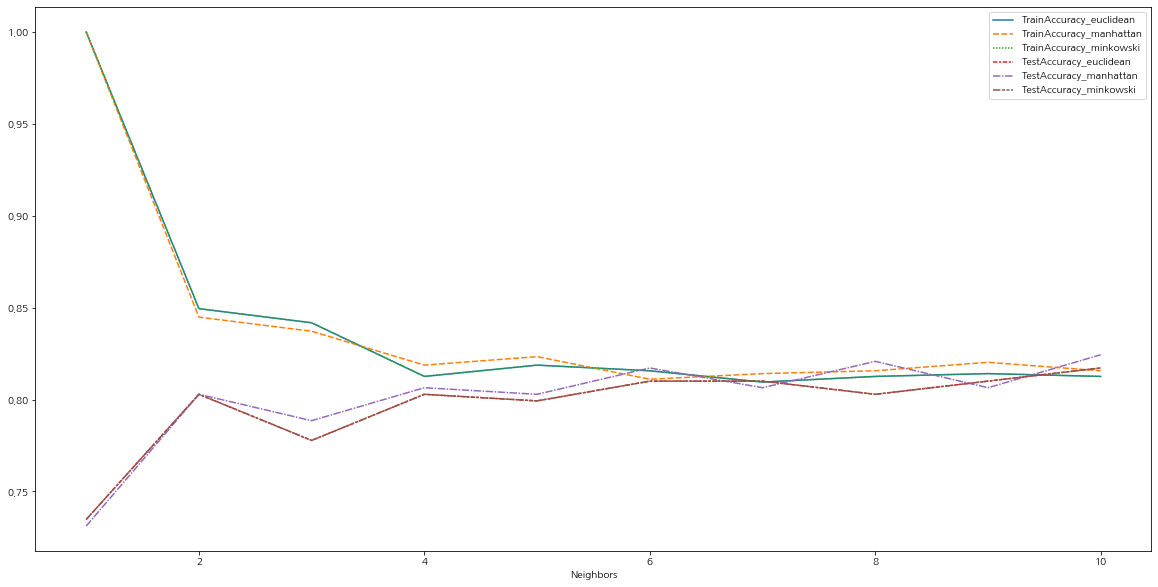

In [102]:
df_accuracy_metric_pivot=df_accuracy_metric.pivot(index='Neighbors', columns='Metric', values=['TrainAccuracy', "TestAccuracy"])
level0= df_accuracy_metric_pivot.columns.get_level_values(0)
level1= df_accuracy_metric_pivot.columns.get_level_values(1)
df_accuracy_metric_pivot.columns=level0+'_'+level1
sns.lineplot(data= df_accuracy_metric_pivot)

In [105]:
knn_model= KNeighborsClassifier(n_neighbors=4, weights='uniform', metric='euclidean' )

knn_model.fit(df_train_x, df_train_y)

y_pred= knn_model.predict(df_test_x)
print('train data accuracy:{:.3f}'.format(knn_model.score(df_train_x, df_train_y)))
print('test data accuracy:{:.3f}'.format(knn_model.score(df_test_x, df_test_y)))
print('Confusion matrix:\n{}'.format(confusion_matrix(df_test_y, y_pred)))

train data accuracy:0.813
test data accuracy:0.803
Confusion matrix:
[[221   6]
 [ 49   3]]
